In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flats.csv")

In [3]:
df.shape

(5589, 3)

In [4]:
df.head()

,header,price,subtitle
0,"3-комнатная квартира, 62.7 м², 2/9 этаж",31000000,"Казыбек би р-н, мкр Юго-Восток, Степной 3 3/8"
1,"2-комнатная квартира, 54 м², 14/16 этаж",18500000,"Казыбек би р-н, мкр Юго-Восток, Республики 18/2"
2,"3-комнатная квартира, 49 м², 5/5 этаж",18500000,"Казыбек би р-н, мкр Юго-Восток, Муканова — Стр..."
3,"2-комнатная квартира, 44 м², 2/9 этаж",18000000,"Казыбек би р-н, мкр Юго-Восток, Мкр муканова 17"
4,"4-комнатная квартира, 80 м², 2/5 этаж",40000000,"Казыбек би р-н, мкр Михайловка , Касыма Аманжо..."


In [5]:
rooms_count = pd.Series(name="rooms_count", dtype=int, data=np.zeros(len(df)))
area = pd.Series(name="area", dtype=float, data=np.zeros(len(df)))
floor = pd.Series(name="floor", dtype=int, data=np.zeros(len(df)))
max_floor = pd.Series(name="max_floors", dtype=int, data=np.zeros(len(df)))

splited_headers = []

In [6]:
def fill_splited_headers():
    for header in df["header"]:
        splited_headers.append(header.split(","))

In [7]:
fill_splited_headers()

In [8]:
def fill_rooms_count():
    for i in range(len(splited_headers)):
        rooms_count.update({i: int(splited_headers[i][0][0])})

In [9]:
def fill_area():
    for i in range(len(splited_headers)):
        num = splited_headers[i][1].replace("м²", "")
        area.update({i : float(num)})

In [10]:
def fill_floors():
    for i in range(len(splited_headers)):
        if(len(splited_headers[i]) == 3):
            cur_floors = splited_headers[i][2].replace(" этаж", "").split("/")
            if len(cur_floors) == 2:
                floor.update({i : int(cur_floors[0])})
                max_floor.update({i: int(cur_floors[1])})
            else:
                floor.update({i : int(cur_floors[0])})

In [11]:
fill_rooms_count()
fill_area()
fill_floors()

In [12]:
import re

In [13]:
district = pd.Series(name="district", dtype=str, data=np.zeros(len(df)))
micro_district = pd.Series(name="micro_district", dtype=str, data=np.zeros(len(df)))
street = pd.Series(name="street", dtype=str, data=np.zeros(len(df)))
splited_subtitles = []

In [14]:
def fill_splited_subtitles():
    for subtitle in df["subtitle"]:
        splited_subtitles.append(subtitle.split(","))

In [15]:
fill_splited_subtitles()

In [16]:
def fill_districts():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 1:
            district.update({i: splited_subtitles[i][0].lower()})
        else:
            street.update({i : re.sub("\/", "", re.sub("\d", "", splited_subtitles[i][0].lower()))})

In [17]:
def fill_micro_districts():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 1: 
            micro_district.update({i: splited_subtitles[i][1].lower()})

In [18]:
def fill_streets():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 2:
            street.update({i: re.sub("\/", "", re.sub("\d", "", splited_subtitles[i][2].lower()))})

In [19]:
fill_districts()
fill_micro_districts()
fill_streets()

In [20]:
result_df = pd.DataFrame()
result_df["rooms_count"] = rooms_count
result_df["area"] = area
result_df["floor"] = floor
result_df["max_floor"] = max_floor
result_df["district"] = district
result_df["micro_district"] = micro_district
result_df["street"] = street

In [21]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street
0,3,62.7,2,9,казыбек би р-н,мкр юго-восток,степной
1,2,54.0,14,16,казыбек би р-н,мкр юго-восток,республики
2,3,49.0,5,5,казыбек би р-н,мкр юго-восток,муканова — строителей
3,2,44.0,2,9,казыбек би р-н,мкр юго-восток,мкр муканова
4,4,80.0,2,5,казыбек би р-н,мкр михайловка,касыма аманжолова


In [22]:
def remove_string_from_price():
    for i in range(len(df)):
        df["price"].iloc[i] = re.sub("[^\d]", "", df["price"].iloc[i])

In [23]:
remove_string_from_price()

In [24]:
result_df["price"] = df["price"]
result_df["price"] = result_df["price"].astype("float")

In [25]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street,price
0,3,62.7,2,9,казыбек би р-н,мкр юго-восток,степной,31000000.0
1,2,54.0,14,16,казыбек би р-н,мкр юго-восток,республики,18500000.0
2,3,49.0,5,5,казыбек би р-н,мкр юго-восток,муканова — строителей,18500000.0
3,2,44.0,2,9,казыбек би р-н,мкр юго-восток,мкр муканова,18000000.0
4,4,80.0,2,5,казыбек би р-н,мкр михайловка,касыма аманжолова,40000000.0


In [26]:
result_df.shape

(5589, 8)

In [27]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rooms_count     5589 non-null   int32  
 1   area            5589 non-null   float64
 2   floor           5589 non-null   int32  
 3   max_floor       5589 non-null   int32  
 4   district        5589 non-null   object 
 5   micro_district  5589 non-null   object 
 6   street          5589 non-null   object 
 7   price           5589 non-null   float64
dtypes: float64(2), int32(3), object(3)
memory usage: 283.9+ KB


In [28]:
numeric = ["rooms_count", "area", "floor", "max_floor"]
categorical = ["district", "micro_district", "street"]
label = "price"

<AxesSubplot:xlabel='rooms_count', ylabel='count'>

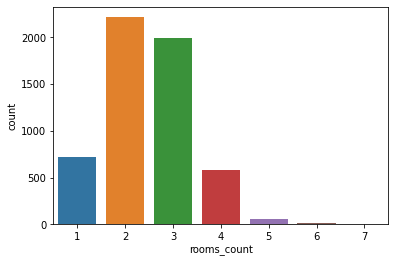

In [29]:
sns.countplot(data=result_df, x="rooms_count")

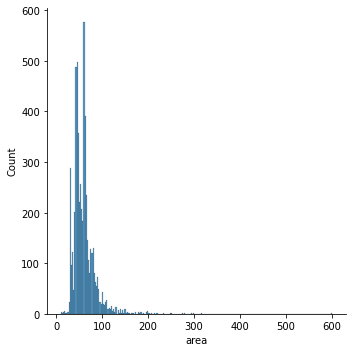

In [30]:
sns.displot(data=result_df, x="area")

<AxesSubplot:xlabel='floor', ylabel='count'>

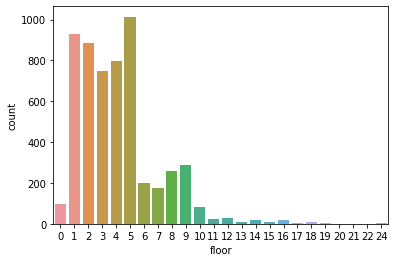

In [31]:
sns.countplot(data=result_df, x="floor")

<AxesSubplot:xlabel='max_floor', ylabel='count'>

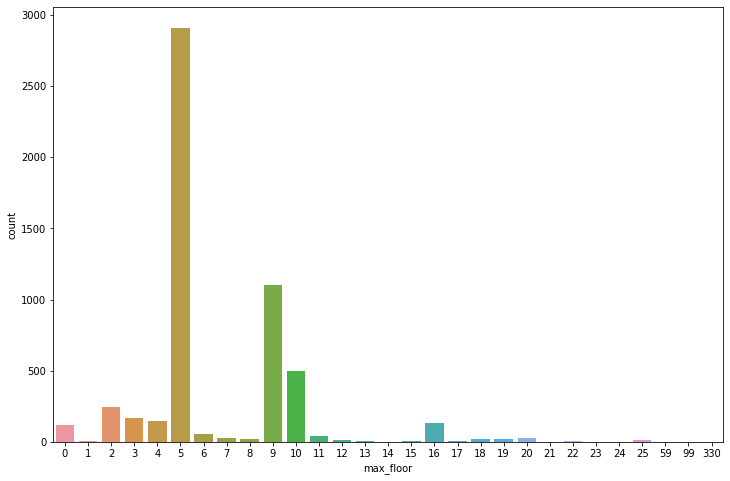

In [32]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="max_floor")

<AxesSubplot:xlabel='district', ylabel='count'>

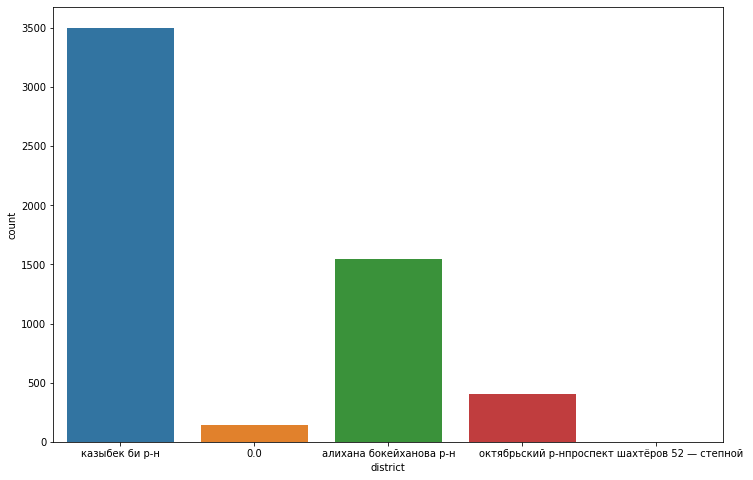

In [33]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="district")

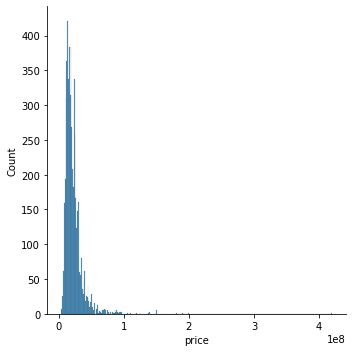

In [34]:
sns.displot(data=result_df, x=label)

In [35]:
result_df["price"] = np.log(result_df["price"])

In [36]:
result_df["area"] = np.log(result_df["area"])

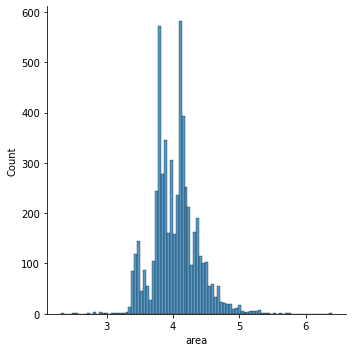

In [37]:
sns.displot(data=result_df, x="area")

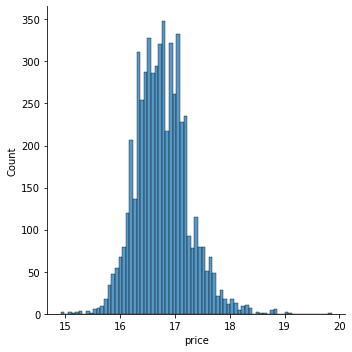

In [38]:
sns.displot(data=result_df, x="price")

In [39]:
result_df["district"].unique()

array(['казыбек би р-н', '0.0', 'алихана бокейханова р-н',
       'октябрьский р-н', 'проспект шахтёров 52 — степной '], dtype=object)

In [40]:
result_df[result_df["district"] == "проспект шахтёров 52 — степной "]

,rooms_count,area,floor,max_floor,district,micro_district,street,price
3514,3,4.70048,3,18,проспект шахтёров 52 — степной,гульдер,0.0,17.55318


In [41]:
result_df = result_df.drop([3514], axis=0)

In [42]:
result_df[result_df["district"] == "проспект шахтёров 52 — степной "]

,rooms_count,area,floor,max_floor,district,micro_district,street,price


<AxesSubplot:xlabel='district', ylabel='count'>

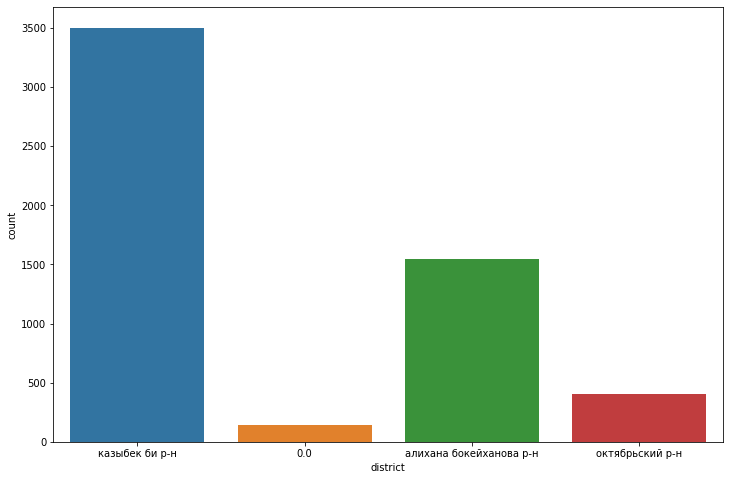

In [43]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="district")

In [44]:
result_df.loc[result_df["district"] == "октябрьский р-н", "district"] = "алихана бокейханова р-н"

<AxesSubplot:xlabel='district', ylabel='count'>

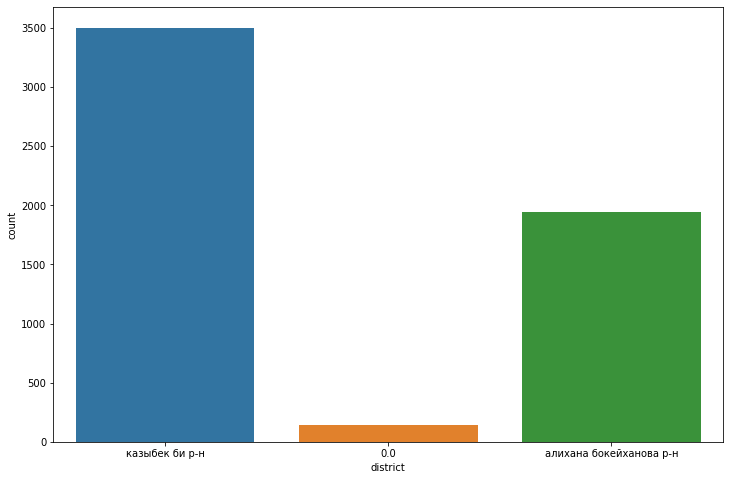

In [45]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="district")

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
categorical_not_encoded = pd.DataFrame()
categorical_not_encoded["district"] = result_df["district"]
categorical_not_encoded["micro_district"] = result_df["micro_district"]
categorical_not_encoded["street"] = result_df["street"]

In [48]:
for col in categorical:
    result_df[col] = LabelEncoder().fit_transform(result_df[col])

In [49]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street,price
0,3,4.138361,2,9,2,1002,670,17.249498
1,2,3.988984,14,16,2,1002,645,16.733281
2,3,3.891820,5,5,2,1002,516,16.733281
3,2,3.784190,2,9,2,1002,460,16.705882
4,4,4.382027,2,5,2,828,334,17.504390


In [50]:
decoded_district = pd.Series(data = result_df["district"].unique(), index = categorical_not_encoded["district"].unique())
decoded_micro_district = pd.Series(data = result_df["micro_district"].unique(), index = categorical_not_encoded["micro_district"].unique())
decoded_street = pd.Series(data = result_df["street"].unique(), index = categorical_not_encoded["street"].unique())

In [51]:
decoded_district

казыбек би р-н             2
0.0                        0
алихана бокейханова р-н    1
dtype: int32

In [52]:
decoded_district.loc["казыбек би р-н"]

2

In [53]:
decoded_micro_district

 мкр юго-восток         1002
 мкр михайловка          828
 мкр новый город         861
 тургенева              1424
 тургенева участок 4    1426
                        ... 
 республика 4           1320
 17 мкр 52                92
 орлова                 1190
 коммунальная            598
 бадина                  233
Length: 1499, dtype: int32

In [54]:
decoded_street.loc["ержанова"]

838

<AxesSubplot:>

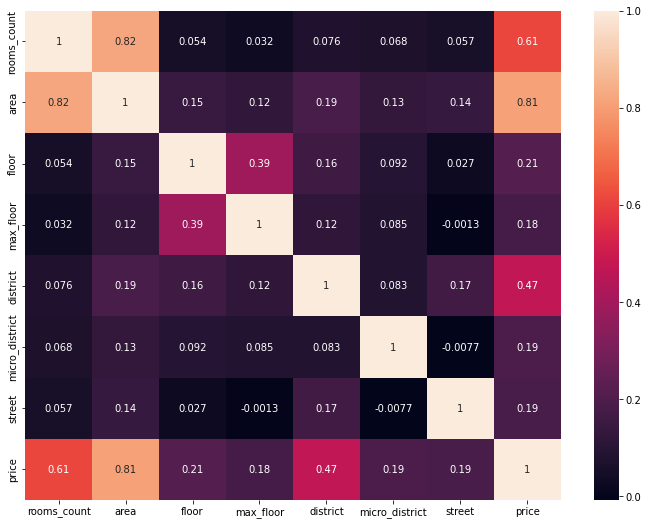

In [55]:
corr = result_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)

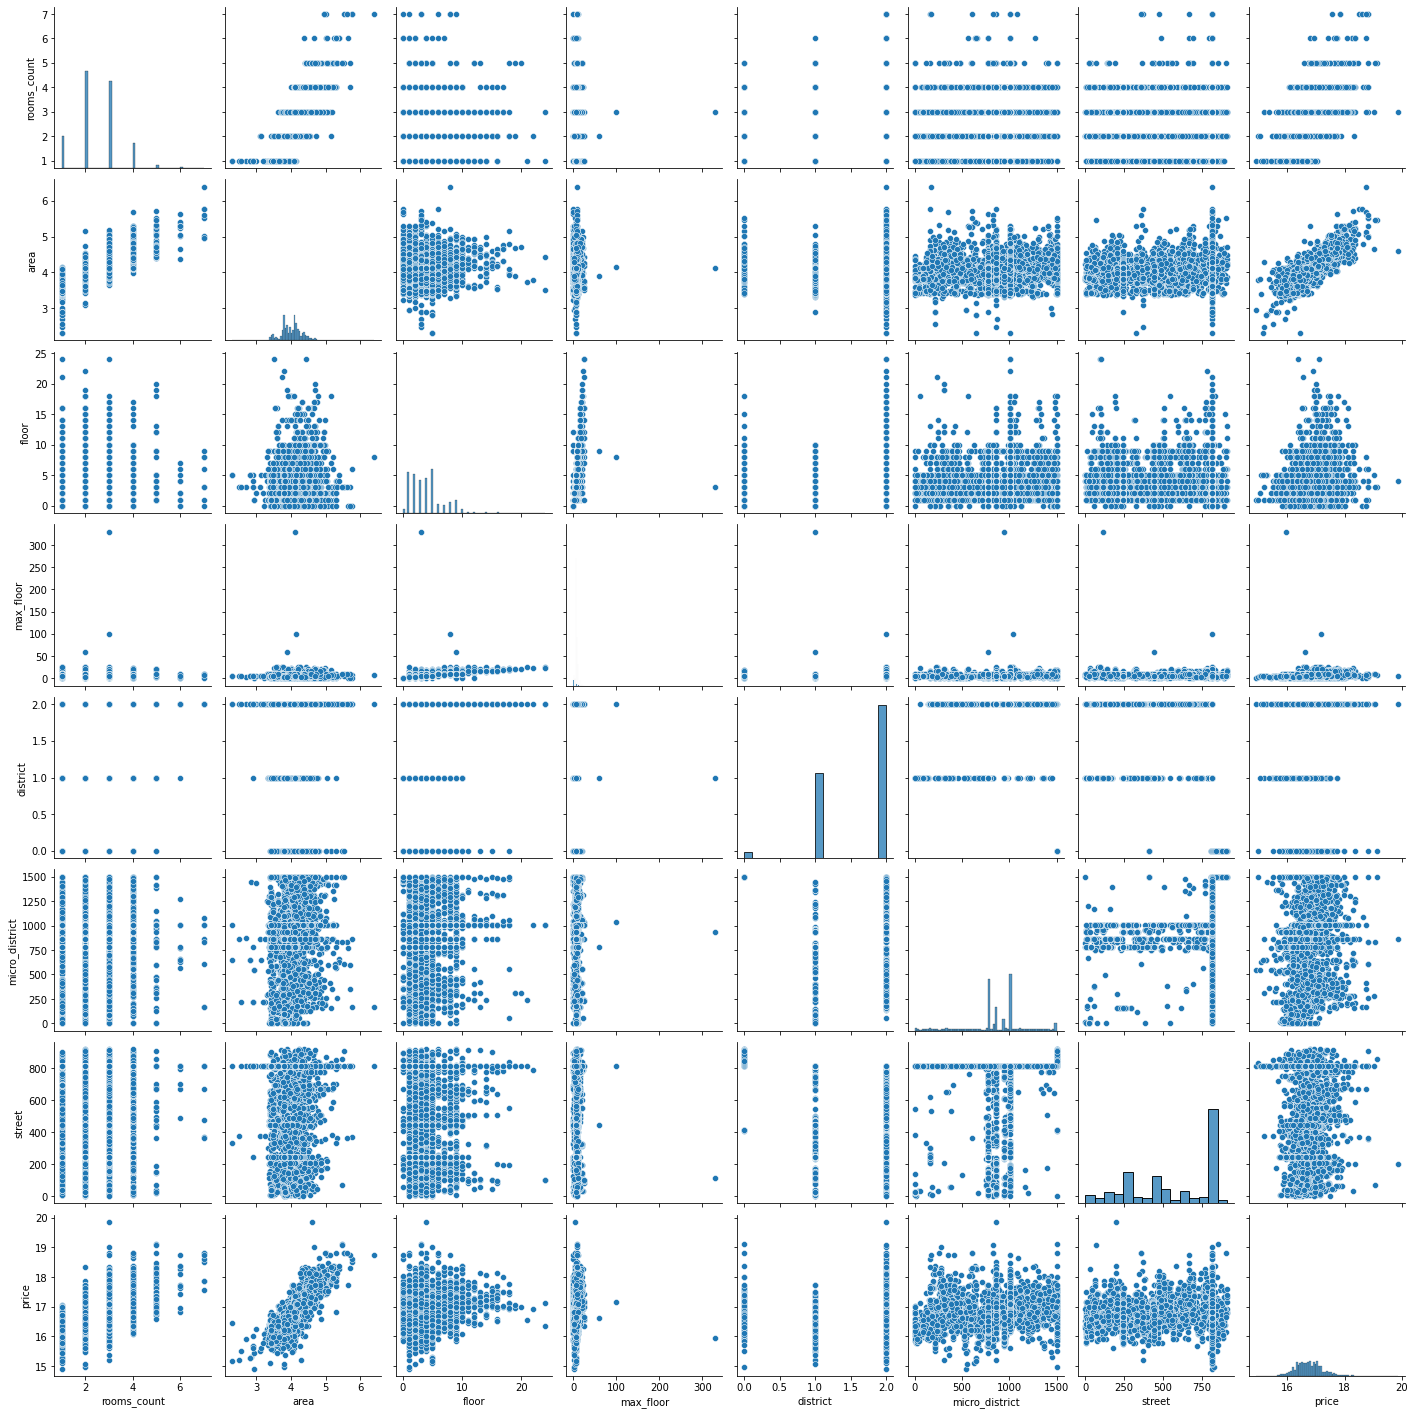

In [56]:
sns.pairplot(result_df)

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
features = result_df.drop(columns=label).columns

In [59]:
x, y = result_df[features], result_df[label]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [61]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)

In [62]:
gb_predictions = gb_model.predict(x_test)

In [63]:
def show_metrics(predictions):
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("R2: ", r2)
    print("Root MSE: ", rmse)

In [64]:
show_metrics(gb_predictions)

R2:  0.8416499374551212
Root MSE:  0.19242955845701698


In [65]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

In [66]:
rf_predictions = rf_model.predict(x_test)

In [67]:
show_metrics(rf_predictions)

R2:  0.8423233153023371
Root MSE:  0.19201997272769197


In [68]:
svr_model = SVR().fit(x_train, y_train)

In [69]:
svr_predictions = svr_model.predict(x_test)

In [70]:
show_metrics(svr_predictions)

R2:  0.1857796946056277
Root MSE:  0.4363486414223997


In [71]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [72]:
knn_predictions = knn_model.predict(x_test)

In [73]:
show_metrics(knn_predictions)

R2:  0.4656221680782261
Root MSE:  0.3534979344833548


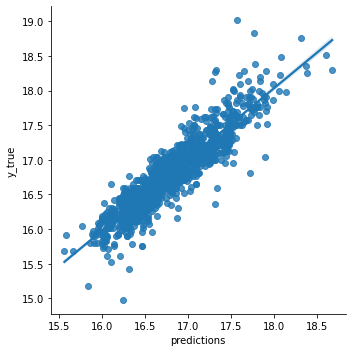

In [74]:
sns.lmplot(data=pd.DataFrame({"predictions": gb_predictions, "y_true": y_test}), x="predictions", y="y_true")

In [75]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
r2_lr = pd.Series(index = learning_rates, dtype=float)
for lr in learning_rates:
    model = GradientBoostingRegressor(learning_rate=lr).fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2_lr.update({lr: r2_score(y_test, predictions)})

In [76]:
r2_lr.sort_values()

0.01    0.660448
1.00    0.825656
0.05    0.828848
0.10    0.841544
0.50    0.847966
0.25    0.855374
dtype: float64

In [77]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
r2_nestimators = pd.Series(index = n_estimators, dtype=float)
for n_est in n_estimators:
    model = GradientBoostingRegressor(n_estimators=n_est, learning_rate=0.25).fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2_nestimators.update({n_est: r2_score(y_test, predictions)})

In [78]:
r2_nestimators.sort_values()

1      0.314763
2      0.503373
4      0.689815
8      0.791017
16     0.820801
32     0.837299
64     0.850997
100    0.854826
200    0.855397
dtype: float64

In [79]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
r2_maxd = pd.Series(index = max_depths, dtype=float)
for max_d in max_depths:
    model = GradientBoostingRegressor(max_depth=max_d, learning_rate=0.25, n_estimators=200).fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2_maxd.update({max_d: r2_score(y_test, predictions)})

In [80]:
r2_maxd.sort_values()

27.0    0.734892
32.0    0.736652
31.0    0.736689
24.0    0.737176
29.0    0.737658
30.0    0.737848
26.0    0.738324
25.0    0.740238
28.0    0.740477
23.0    0.744610
22.0    0.745688
21.0    0.751618
20.0    0.753843
19.0    0.758589
18.0    0.764542
17.0    0.774753
15.0    0.788422
16.0    0.790569
14.0    0.798115
13.0    0.811579
12.0    0.813803
11.0    0.818136
10.0    0.825529
9.0     0.826866
1.0     0.827039
8.0     0.836454
7.0     0.847057
5.0     0.849955
6.0     0.853320
2.0     0.853698
3.0     0.855744
4.0     0.856679
dtype: float64

In [81]:
model = GradientBoostingRegressor(max_depth=3, learning_rate=0.25, n_estimators=200).fit(x_train, y_train)

In [82]:
predictions = model.predict(x_test)

In [83]:
show_metrics(predictions)

R2:  0.8561914819070853
Root MSE:  0.18338126710075708


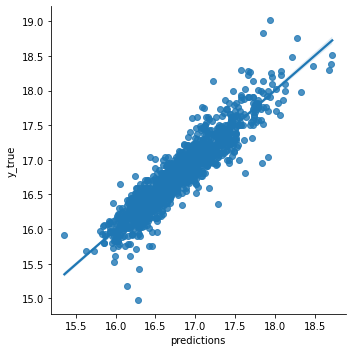

In [84]:
sns.lmplot(data=pd.DataFrame({"predictions": predictions, "y_true": y_test}), x="predictions", y="y_true")

In [85]:
flat_df = pd.DataFrame(columns=x_test.columns)
flat_df = flat_df.append({"rooms_count": 2, "area": np.log(50), "floor": 5, "max_floor": 9,
                "district": 2, "micro_district": 861, "street": 838}, ignore_index=True)
flat_df

,rooms_count,area,floor,max_floor,district,micro_district,street
0,2.0,3.912023,5.0,9.0,2.0,861.0,838.0


In [86]:
flat_predicted_price = model.predict(flat_df)

In [87]:
np.exp(flat_predicted_price[0])

23656861.713177945